In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Chargement et préparation de votre image ---
try:
    # Chargez l'image depuis le disque
    image_path = 'ballons_33_289_32.png'  # ASSUREZ-VOUS QUE LE NOM DU FICHIER EST CORRECT
    depth_block_color = cv2.imread(image_path)
    
    # Vérifier si l'image a été chargée correctement
    if depth_block_color is None:
        raise FileNotFoundError(f"L'image n'a pas été trouvée à l'emplacement : {image_path}. Vérifiez le chemin et le nom du fichier.")

    # Convertir l'image en niveaux de gris (une carte de profondeur a un seul canal)
    depth_block = cv2.cvtColor(depth_block_color, cv2.COLOR_BGR2GRAY)
    BLOCK_HEIGHT, BLOCK_WIDTH = depth_block.shape
    print(f"Image chargée avec succès. Dimensions : {BLOCK_WIDTH}x{BLOCK_HEIGHT}")

except FileNotFoundError as e:
    print(e)
    # Si l'image n'est pas trouvée, on arrête le script
    exit()


Image chargée avec succès. Dimensions : 32x32


In [34]:
# --- 2. Application du Gradient pour détecter les contours ---
# On utilise Sobel pour trouver les contours
sobel_x = cv2.Sobel(depth_block, cv2.CV_64F, 1, 0, ksize=5) # ksize=5 pour être plus robuste au bruit
sobel_y = cv2.Sobel(depth_block, cv2.CV_64F, 0, 1, ksize=5)

gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normaliser et seuiller pour obtenir une carte binaire des contours
gradient_magnitude_normalized = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# On ajuste le seuil pour mieux capturer le contour principal
_, edge_map = cv2.threshold(gradient_magnitude_normalized, 30, 255, cv2.THRESH_BINARY)


# --- 3. Trouver la ligne avec la méthode des moindres carrés ---
edge_points = np.argwhere(edge_map > 0)
y_coords = edge_points[:, 0]
x_coords = edge_points[:, 1]

In [38]:
# Appliquer les moindres carrés pour y = mx + b
if len(x_coords) > 1:
    # Utiliser un bloc try-except car polyfit peut parfois échouer si les points sont verticaux
    try:
        m, b = np.polyfit(x_coords, y_coords, 1)
        print(f"Ligne trouvée par les moindres carrés : y = {m:.2f}x + {b:.2f}")

        # Créer les points de la ligne pour l'affichage
        x_line = np.array([0, BLOCK_WIDTH - 1])
        y_line = m * x_line + b
    except np.linalg.LinAlgError:
        print("Erreur: Le calcul a échoué. Les points sont peut-être sur une ligne verticale parfaite.")
        x_line, y_line = [], []
else:
    print("Pas assez de points de contour trouvés pour définir une ligne.")
    x_line, y_line = [], []

Ligne trouvée par les moindres carrés : y = -0.44x + 16.23


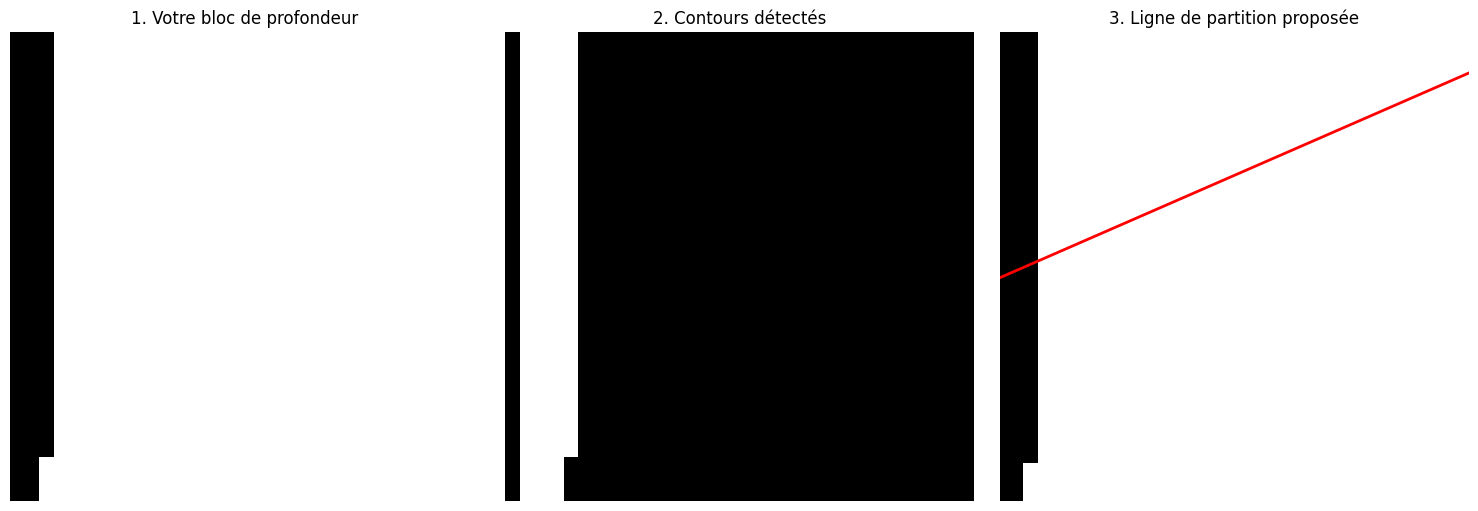

In [39]:
# --- 4. Visualisation des résultats ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(depth_block, cmap='gray')
plt.title('1. Votre bloc de profondeur')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edge_map, cmap='gray')
plt.title('2. Contours détectés')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(depth_block, cmap='gray')
if len(x_line) > 0:
    plt.plot(x_line, y_line, color='red', linewidth=2)
# Limiter les axes pour ne pas que la ligne dépasse le cadre de l'image
plt.xlim(0, BLOCK_WIDTH -1)
plt.ylim(BLOCK_HEIGHT - 1, 0) # L'axe y est inversé dans l'affichage d'images
plt.title('3. Ligne de partition proposée')
plt.axis('off')

plt.tight_layout()
plt.show()

Image chargée avec succès. Dimensions : 32x32
Ligne trouvée par les moindres carrés : y = -0.44x + 16.23


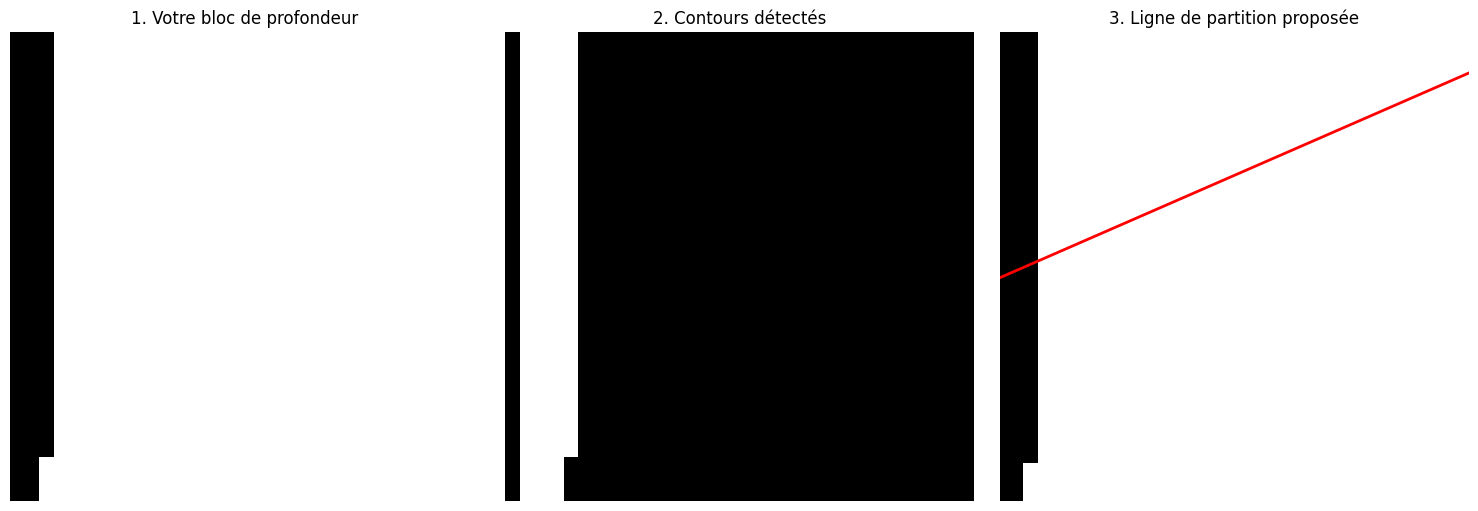

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Chargement et préparation de votre image ---
try:
    # Chargez l'image depuis le disque
    image_path = 'ballons_33_289_32.png'  # ASSUREZ-VOUS QUE LE NOM DU FICHIER EST CORRECT
    depth_block_color = cv2.imread(image_path)
    
    # Vérifier si l'image a été chargée correctement
    if depth_block_color is None:
        raise FileNotFoundError(f"L'image n'a pas été trouvée à l'emplacement : {image_path}. Vérifiez le chemin et le nom du fichier.")

    # Convertir l'image en niveaux de gris (une carte de profondeur a un seul canal)
    depth_block = cv2.cvtColor(depth_block_color, cv2.COLOR_BGR2GRAY)
    BLOCK_HEIGHT, BLOCK_WIDTH = depth_block.shape
    print(f"Image chargée avec succès. Dimensions : {BLOCK_WIDTH}x{BLOCK_HEIGHT}")

except FileNotFoundError as e:
    print(e)
    # Si l'image n'est pas trouvée, on arrête le script
    exit()

# --- 2. Application du Gradient pour détecter les contours ---
# On utilise Sobel pour trouver les contours
sobel_x = cv2.Sobel(depth_block, cv2.CV_64F, 1, 0, ksize=5) # ksize=5 pour être plus robuste au bruit
sobel_y = cv2.Sobel(depth_block, cv2.CV_64F, 0, 1, ksize=5)

gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normaliser et seuiller pour obtenir une carte binaire des contours
gradient_magnitude_normalized = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# On ajuste le seuil pour mieux capturer le contour principal
_, edge_map = cv2.threshold(gradient_magnitude_normalized, 30, 255, cv2.THRESH_BINARY)


# --- 3. Trouver la ligne avec la méthode des moindres carrés ---
edge_points = np.argwhere(edge_map > 0)
y_coords = edge_points[:, 0]
x_coords = edge_points[:, 1]

# Appliquer les moindres carrés pour y = mx + b
if len(x_coords) > 1:
    # Utiliser un bloc try-except car polyfit peut parfois échouer si les points sont verticaux
    try:
        m, b = np.polyfit(x_coords, y_coords, 1)
        print(f"Ligne trouvée par les moindres carrés : y = {m:.2f}x + {b:.2f}")

        # Créer les points de la ligne pour l'affichage
        x_line = np.array([0, BLOCK_WIDTH - 1])
        y_line = m * x_line + b
    except np.linalg.LinAlgError:
        print("Erreur: Le calcul a échoué. Les points sont peut-être sur une ligne verticale parfaite.")
        x_line, y_line = [], []
else:
    print("Pas assez de points de contour trouvés pour définir une ligne.")
    x_line, y_line = [], []

# --- 4. Visualisation des résultats ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(depth_block, cmap='gray')
plt.title('1. Votre bloc de profondeur')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edge_map, cmap='gray')
plt.title('2. Contours détectés')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(depth_block, cmap='gray')
if len(x_line) > 0:
    plt.plot(x_line, y_line, color='red', linewidth=2)
# Limiter les axes pour ne pas que la ligne dépasse le cadre de l'image
plt.xlim(0, BLOCK_WIDTH -1)
plt.ylim(BLOCK_HEIGHT - 1, 0) # L'axe y est inversé dans l'affichage d'images
plt.title('3. Ligne de partition proposée')
plt.axis('off')

plt.tight_layout()
plt.show()

Ligne initiale (Moindres Carrés) : y = -16.00x + 46.50
Coût SAD initial : 2834

--- Démarrage de la Descente de Gradient (Haute Qualité) ---

Convergence atteinte à l'itération 1, gradient nul.

--- Fin de l'optimisation ---
Ligne finale : y = -16.00x + 46.50
Coût SAD final : 2834
Amélioration du coût : 0.00 (0.00%)


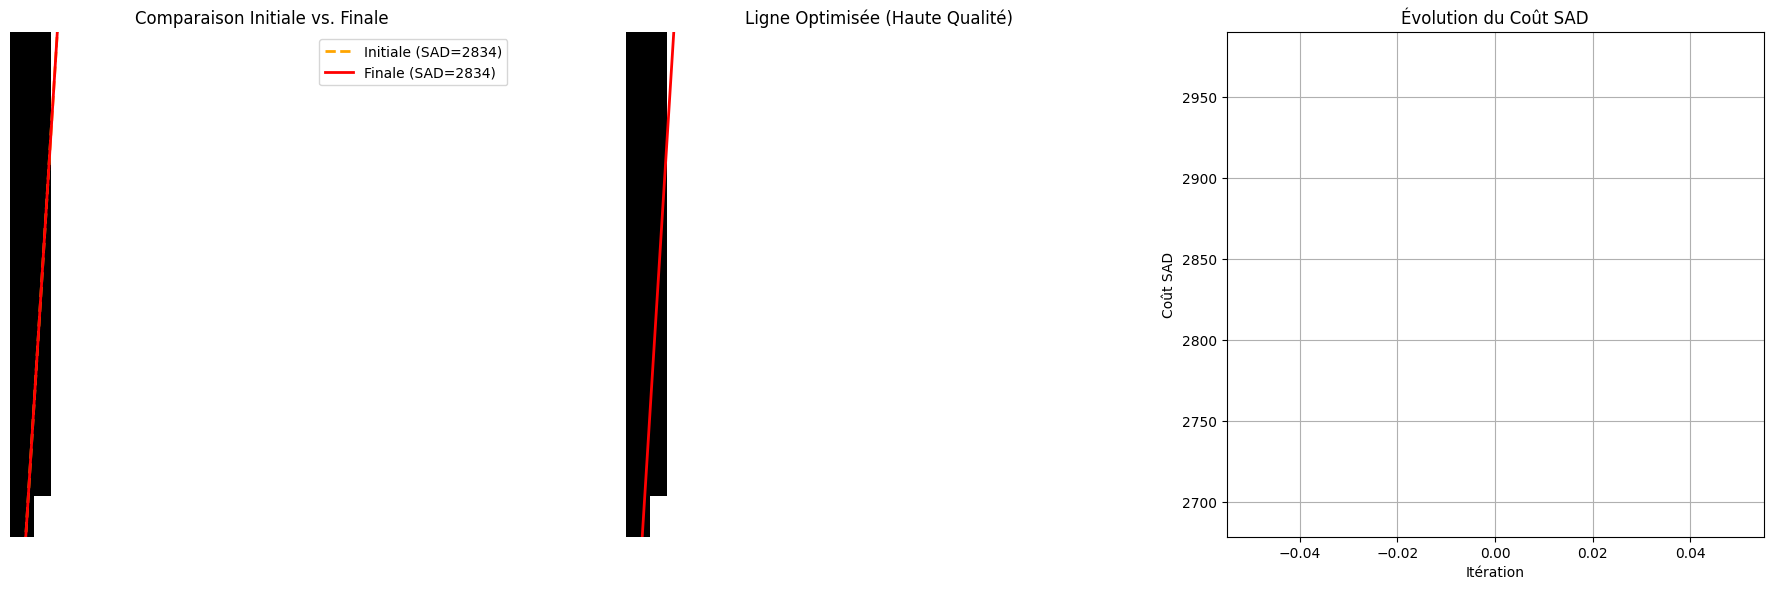

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Fonction de Coût : Calcul du SAD (inchangée) ---
def calculate_sad(depth_block, m, b):
    height, width = depth_block.shape
    region1_pixels, region2_pixels = [], []
    y_coords, x_coords = np.ogrid[:height, :width]
    
    mask_region1 = y_coords > m * x_coords + b
    
    region1_pixels = depth_block[mask_region1]
    region2_pixels = depth_block[~mask_region1]
    
    if region1_pixels.size == 0 or region2_pixels.size == 0:
        return float('inf')

    mean_region1 = np.mean(region1_pixels)
    mean_region2 = np.mean(region2_pixels)
    sad1 = np.sum(np.abs(region1_pixels - mean_region1))
    sad2 = np.sum(np.abs(region2_pixels - mean_region2))
    return sad1 + sad2

# --- Chargement et Moindres Carrés (inchangés) ---
try:
    image_path = 'ballons_33_289_32.png'
    depth_block = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if depth_block is None: raise FileNotFoundError(f"Image non trouvée: {image_path}")
    BLOCK_HEIGHT, BLOCK_WIDTH = depth_block.shape
except FileNotFoundError as e:
    print(e)
    exit()

edge_map = cv2.Canny(depth_block, 30, 100)
edge_points = np.argwhere(edge_map > 0)
y_coords, x_coords = edge_points[:, 0], edge_points[:, 1]

if len(x_coords) > 1:
    m_initial, b_initial = np.polyfit(x_coords, y_coords, 1)
else:
    print("Pas de contours, arrêt.")
    exit()

initial_cost = calculate_sad(depth_block, m_initial, b_initial)
print(f"Ligne initiale (Moindres Carrés) : y = {m_initial:.2f}x + {b_initial:.2f}")
print(f"Coût SAD initial : {initial_cost:.0f}")

# --- Descente de Gradient MODIFIÉE pour la Haute Qualité ---
m_final = m_initial
b_final = b_initial
current_cost = initial_cost

# MODIFICATION 1: Augmentation des taux d'apprentissage
learning_rate_m = 0.5   # Augmenté de 0.01 à 0.5
learning_rate_b = 5.0    # Augmenté de 0.5 à 5.0

# MODIFICATION 2: Augmentation des itérations
num_iterations = 200
h = 0.1 

print("\n--- Démarrage de la Descente de Gradient (Haute Qualité) ---")

cost_history = [initial_cost] # Pour suivre l'évolution du coût

for i in range(num_iterations):
    # Calcul du gradient numérique pour m
    cost_plus_h_m = calculate_sad(depth_block, m_final + h, b_final)
    grad_m = (cost_plus_h_m - current_cost) / h
    
    # Calcul du gradient numérique pour b
    cost_plus_h_b = calculate_sad(depth_block, m_final, b_final + h)
    grad_b = (cost_plus_h_b - current_cost) / h
    
    # Arrêt si le gradient est nul (on est dans un minimum)
    if abs(grad_m) < 1e-6 and abs(grad_b) < 1e-6:
        print(f"\nConvergence atteinte à l'itération {i+1}, gradient nul.")
        break
        
    # Mise à jour des paramètres
    m_final = m_final - learning_rate_m * grad_m
    b_final = b_final - learning_rate_b * grad_b
    
    # Mise à jour du coût
    current_cost = calculate_sad(depth_block, m_final, b_final)
    cost_history.append(current_cost)
    
    # MODIFICATION 3: Affichage plus détaillé
    if (i + 1) % 10 == 0:
        print(f"It {i+1:3d}: Coût={current_cost:.0f} (grad_m={grad_m:.2f}, grad_b={grad_b:.2f}) -> Ligne: y={m_final:.2f}x+{b_final:.2f}")

print("\n--- Fin de l'optimisation ---")
print(f"Ligne finale : y = {m_final:.2f}x + {b_final:.2f}")
print(f"Coût SAD final : {current_cost:.0f}")
print(f"Amélioration du coût : {initial_cost - current_cost:.2f} ({((initial_cost - current_cost) / initial_cost) * 100:.2f}%)")

# --- Visualisation finale (avec graphique d'évolution du coût) ---
plt.figure(figsize=(18, 6))

# Graphe 1: Comparaison des lignes
plt.subplot(1, 3, 1)
plt.imshow(depth_block, cmap='gray')
x_line = np.array([0, BLOCK_WIDTH - 1])
# Ligne initiale
y_line_initial = m_initial * x_line + b_initial
plt.plot(x_line, y_line_initial, color='orange', linestyle='--', linewidth=2, label=f'Initiale (SAD={initial_cost:.0f})')
# Ligne finale
y_line_final = m_final * x_line + b_final
plt.plot(x_line, y_line_final, color='red', linewidth=2, label=f'Finale (SAD={current_cost:.0f})')
plt.xlim(0, BLOCK_WIDTH - 1); plt.ylim(BLOCK_HEIGHT - 1, 0)
plt.title('Comparaison Initiale vs. Finale')
plt.legend()
plt.axis('off')

# Graphe 2: Ligne finale seule
plt.subplot(1, 3, 2)
plt.imshow(depth_block, cmap='gray')
plt.plot(x_line, y_line_final, color='red', linewidth=2)
plt.xlim(0, BLOCK_WIDTH - 1); plt.ylim(BLOCK_HEIGHT - 1, 0)
plt.title('Ligne Optimisée (Haute Qualité)')
plt.axis('off')

# Graphe 3: Évolution du coût
plt.subplot(1, 3, 3)
plt.plot(cost_history)
plt.title('Évolution du Coût SAD')
plt.xlabel('Itération')
plt.ylabel('Coût SAD')
plt.grid(True)

plt.tight_layout()
plt.show()




Ligne estimée par Moindres Carrés : y = 9.00x + -85.75


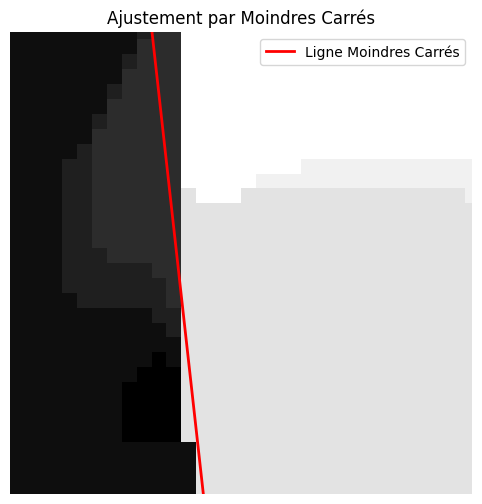

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Chargement de l'image ---
try:
    image_path = 'ballons_161_257_32.png'
    depth_block = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if depth_block is None:
        raise FileNotFoundError(f"Image non trouvée: {image_path}")
    BLOCK_HEIGHT, BLOCK_WIDTH = depth_block.shape
except FileNotFoundError as e:
    print(e)
    exit()

# --- Extraction des contours ---
edge_map = cv2.Canny(depth_block, 30, 100)
edge_points = np.argwhere(edge_map > 0)
y_coords, x_coords = edge_points[:, 0], edge_points[:, 1]

if len(x_coords) > 1:
    m_initial, b_initial = np.polyfit(x_coords, y_coords, 1)
else:
    print("Pas de contours détectés, arrêt.")
    exit()

print(f"Ligne estimée par Moindres Carrés : y = {m_initial:.2f}x + {b_initial:.2f}")

# --- Visualisation ---
plt.figure(figsize=(10, 6))
plt.imshow(depth_block, cmap='gray')
x_line = np.array([0, BLOCK_WIDTH - 1])
y_line = m_initial * x_line + b_initial
plt.plot(x_line, y_line, color='red', linewidth=2, label='Ligne Moindres Carrés')
plt.xlim(0, BLOCK_WIDTH - 1)
plt.ylim(BLOCK_HEIGHT - 1, 0)
plt.title('Ajustement par Moindres Carrés')
plt.legend()
plt.axis('off')
plt.show()
